In [7]:
import pandas as pd
import os

dataset_main_path = 'UCI HAR Dataset'
train_data_path = os.path.join(dataset_main_path, 'train/X_train.txt')
train_labels_path = os.path.join(dataset_main_path, 'train/y_train.txt')
train_subjects_path = os.path.join(dataset_main_path, 'train/subject_train.txt')


In [8]:
X_train = pd.read_csv(train_data_path, delim_whitespace=True, header=None)
y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None, names=['activity'])
subjects_train = pd.read_csv(train_subjects_path, delim_whitespace=True, header=None, names=['subject'])

C:\Users\va001\AppData\Local\Temp\ipykernel_15004\1203601069.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(train_data_path, delim_whitespace=True, header=None)
C:\Users\va001\AppData\Local\Temp\ipykernel_15004\1203601069.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(train_labels_path, delim_whitespace=True, header=None, names=['activity'])
C:\Users\va001\AppData\Local\Temp\ipykernel_15004\1203601069.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  subjects_train = pd.read_csv(train_subjects_path, delim_whitespace=True, header=None, names=['subject'])


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("subjects_train shape:", subjects_train.shape)

print("\nX_train (variáveis):")
print(X_train.head())

print("\ny_train (atividades):")
print(y_train.head())

print("\nsubjects_train (participantes):")
print(subjects_train.head())

X_train shape: (7352, 561)
y_train shape: (7352, 1)
subjects_train shape: (7352, 1)

X_train (variáveis):
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087

Dados faltantes em X_train: 0
Dados faltantes em y_train: 0
Dados faltantes em subjects_train: 0

Estatísticas descritivas de X_train:
               0            1            2            3            4    \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000   
mean      0.274488    -0.017695    -0.109141    -0.605438    -0.510938   
std       0.070261     0.040811     0.056635     0.448734     0.502645   
min      -1.000000    -1.000000    -1.000000    -1.000000    -0.999873   
25%       0.262975    -0.024863    -0.120993    -0.992754    -0.978129   
50%       0.277193    -0.017219    -0.108676    -0.946196    -0.851897   
75%       0.288461    -0.010783    -0.097794    -0.242813    -0.034231   
max       1.000000     1.000000     1.000000     1.000000     0.916238   

               5            6            7            8            9    ...  \
count  7352.000000  7352.000000  7352.000000  7352.000000  7352.000000  ...   
mean     -0.604754    -0.630512    -0.52

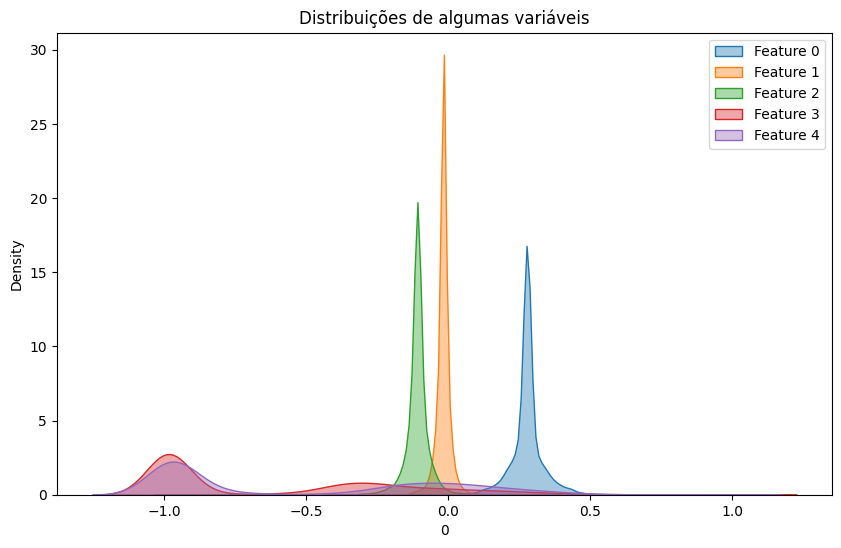

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Dados faltantes em X_train:", X_train.isnull().sum().sum())
print("Dados faltantes em y_train:", y_train.isnull().sum().sum())
print("Dados faltantes em subjects_train:", subjects_train.isnull().sum().sum())

print("\nEstatísticas descritivas de X_train:")
print(X_train.describe())

plt.figure(figsize=(10, 6))
for i, col in enumerate(X_train.columns[:5]):  
    sns.kdeplot(X_train[col], label=f'Feature {col}', fill=True, alpha=0.4)
plt.title("Distribuições de algumas variáveis")
plt.legend()
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train.values.ravel())


In [13]:
from sklearn.model_selection import train_test_split

X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train_encoded, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train_final, y_train_final)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       247
           1       0.97      0.99      0.98       200
           2       1.00      0.98      0.99       206
           3       0.95      0.95      0.95       262
           4       0.95      0.96      0.95       276
           5       1.00      1.00      1.00       280

    accuracy                           0.98      1471
   macro avg       0.98      0.98      0.98      1471
weighted avg       0.98      0.98      0.98      1471

